In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import matplotlib.pyplot as plt
from PFNExperiments.LatentFactorModels.GenerativeModels.LDA.LDA import make_lda_pprogram

In [45]:
from PFNExperiments.LatentFactorModels.GenerativeModels.LatenFactorModel_abstract import return_only_x
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC import Hamiltionian_MC

from PFNExperiments.LatentFactorModels.ComparisonModels.MakeDefaultListComparison import make_default_list_comparison

In [78]:
pprogram = make_lda_pprogram(
    n_docs = 100,
    n_words = 100,
)

In [79]:
import pyro
import torch

In [80]:
pyro.distributions.Multinomial(10, probs=torch.tensor([0.5, 0.5])).sample()

tensor([5., 5.])

In [81]:
x = torch.tensor(
    [
        [1, 0, 0, 0, 0],
        [0, 1, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
    ]
)

In [82]:
r = pprogram(
    x = x
)

x = r["x"]

theta: torch.Size([4, 5]), phi: torch.Size([5, 4]), doc_len: 7


NotImplementedError: inhomogeneous total_count is not supported

In [29]:
print(r["x"])

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])


In [30]:
for key, value in r.items():
    print(key, value.shape)

theta torch.Size([100, 100])
phi torch.Size([100, 100])


AttributeError: 'int' object has no attribute 'shape'

In [119]:
pprogram_return_only_x = return_only_x(pprogram)

In [120]:
models = make_default_list_comparison(pprogram= pprogram_return_only_x, n_samples= 100, discrete_z = False)

model_list = {
        "hmc_sampler": models[0],
        #"vi_diag": models[1],
        "vi_multivariate_normal": models[2],
        #"vi_laplace": models[3],
        "vi_autoIAF": models[4],
        #"vi_autostrucured": models[5],
}

In [121]:
x.shape

torch.Size([50, 5])

In [122]:
samples_per_model = {}

for name, model in model_list.items():
    samples_per_model[name] = model.sample_posterior(x = x)

Sample: 100%|██████████| 150/150 [02:57,  1.19s/it, step size=3.78e-03, acc. prob=0.116]
c:\Users\arik_\Documents\Dokumente\Job_Clausthal\PFNs\Repository\PFNExperiments\.conda\lib\site-packages\pyro\infer\traceenum_elbo.py:355: UserWarning: TraceEnum_ELBO found no sample sites configured for enumeration. If you want to enumerate sites, you need to @config_enumerate or set infer={"enumerate": "sequential"} or infer={"enumerate": "parallel"}? If you do not want to enumerate, consider using Trace_ELBO instead.
  warnings.warn(


....................
....................


In [123]:
r["z"]

tensor([0.0368, 0.9875, 0.0378])

torch.Size([100, 3])
tensor([-1.4517,  1.1844, -0.5683])


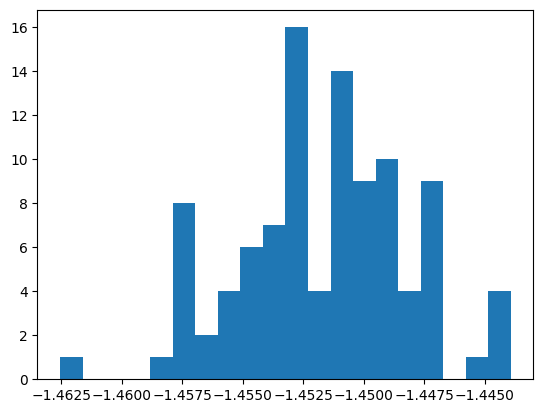

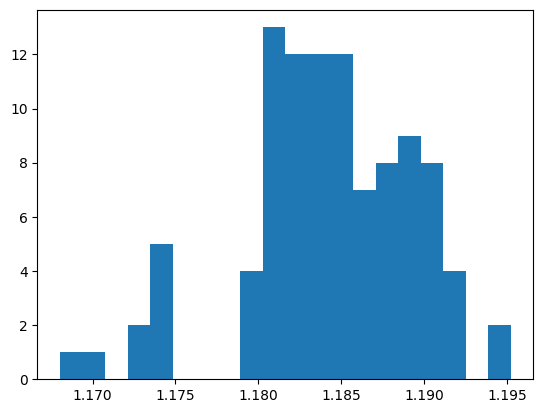

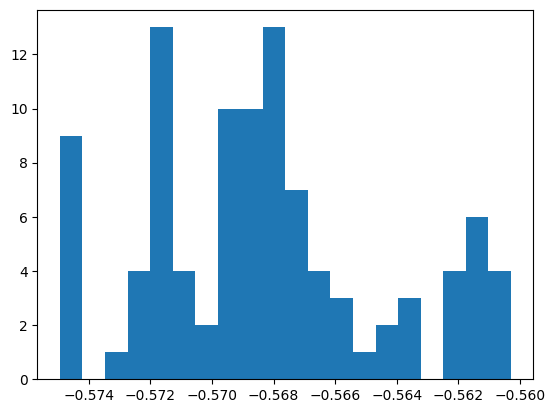

In [124]:
c_model = "hmc_sampler" 

samples_z = samples_per_model[c_model]["z"].squeeze()

print(samples_z.shape)
print(samples_z.mean(axis = 0))

for dim in range(samples_z.shape[1]):
    plt.hist(samples_z[:, dim], bins = 20)
    plt.show()

In [76]:
"""
c_model = "vi_multivariate_normal"
samples_mu = samples_per_model[c_model]["mu"]
samples_sigma = samples_per_model[c_model]["sigma_squared"]

print(samples_mu.mean(dim = 0), samples_mu.std())
print(samples_sigma.mean(dim = 0), samples_sigma.std())

component = 0

for dim in range(5):
    plt.figure()
    plt.hist(samples_per_model[c_model]["mu"][:,component, dim], bins = 30)
    plt.title(f"mu_{dim}")

for dim in range(5):
    plt.figure()
    plt.hist(samples_per_model[c_model]["sigma_squared"][:,component, dim], bins = 30)
    plt.title(f"sigma_{dim}")

"""

'\nc_model = "vi_multivariate_normal"\nsamples_mu = samples_per_model[c_model]["mu"]\nsamples_sigma = samples_per_model[c_model]["sigma_squared"]\n\nprint(samples_mu.mean(dim = 0), samples_mu.std())\nprint(samples_sigma.mean(dim = 0), samples_sigma.std())\n\ncomponent = 0\n\nfor dim in range(5):\n    plt.figure()\n    plt.hist(samples_per_model[c_model]["mu"][:,component, dim], bins = 30)\n    plt.title(f"mu_{dim}")\n\nfor dim in range(5):\n    plt.figure()\n    plt.hist(samples_per_model[c_model]["sigma_squared"][:,component, dim], bins = 30)\n    plt.title(f"sigma_{dim}")\n\n'

In [77]:
samples_per_model["vi_multivariate_normal"]["sigma_squared"].median()

KeyError: 'sigma_squared'

In [ ]:
model = Hamiltionian_MC(
    pprogram=pprogram_return_only_x,
    n_samples=500,
    n_warmup=500
)

In [ ]:
samples = model.sample_posterior(x = x)

Warmup:   4%|▎         | 35/1000 [00:10,  3.93it/s, step size=5.72e-02, acc. prob=0.766]

KeyboardInterrupt: 

In [ ]:
r["mu"]

tensor([-3.9802,  5.3649,  0.9867])

In [ ]:
samples.keys()

dict_keys(['mu', 'phi', 'sigma_squared'])

In [ ]:
samples["mu"].median(dim = 0)

torch.return_types.median(
values=tensor([ 1.0558,  5.3790, -4.1347]),
indices=tensor([334, 389,  28]))

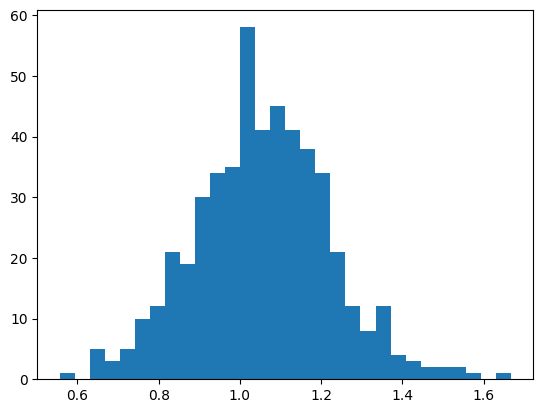

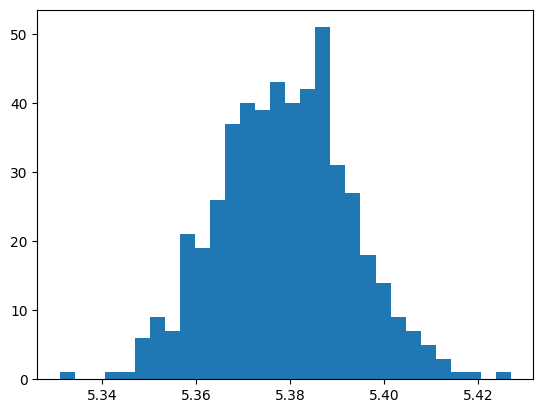

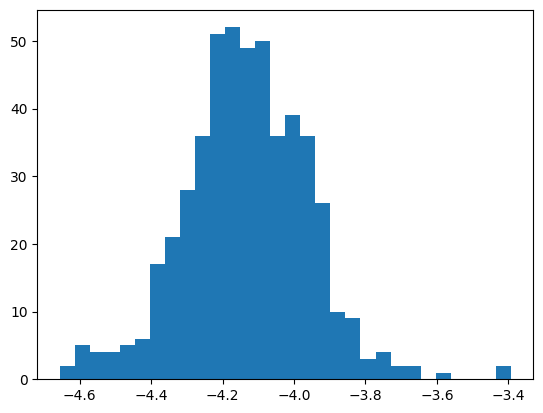

In [ ]:
for dim in range(3):
    plt.hist(samples["mu"][:,dim].numpy(), bins = 30)
    plt.show()

In [113]:
pprogram_batched = make_fa_program_laplace_weight_prior_batched()

In [114]:
rb = pprogram_batched()

In [ ]:
rb["x"].shape

torch.Size([32, 100, 5])

In [ ]:
samples["sigma_squared"].median(dim = 0)

torch.return_types.median(
values=tensor([0.6933, 0.3093, 0.5158]),
indices=tensor([168, 109, 482]))

In [ ]:
pprogram_batched = make_gmm_program_univariate_batched(
    n: int = 100,
    p: int = 5,
    batch_size: int = 32,
    z_dim: int = 3,
    w_var: float = 0.1,
    mu_var: float = 3.0,
    a1_psi_var: float = 5.0,
    b1_psi_var: float = 2.0,
    )
    )

NameError: name 'make_gmm_program_univariate_batched' is not defined

In [ ]:
samples_batched = pprogram_batched()

In [ ]:
samples_batched["sigma_squared"].shape

torch.Size([1000, 3])

In [ ]:
for key in samples_batched.keys():
    print(key, samples_batched[key].shape)

phi torch.Size([3, 1000])
mu torch.Size([1000, 3])
sigma_squared torch.Size([1000, 3])
z torch.Size([1000, 100])
x torch.Size([1000, 100])
beta torch.Size([1000, 6])
